<a href="https://colab.research.google.com/github/sejin-sim/Math/blob/main/2_5)_%EA%B3%B5%EB%B6%84%EC%82%B0%EA%B3%BC_%EC%83%81%EA%B4%80%EA%B3%84%EC%88%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- 다변수 확률변수 간의 상관 관계를 숫자로 나타낸 것 : 공분산(covariance)과 상관계수(correlation coefficient)


### 1) 표본공분산(sample covariance)
1. 표본공분산 : 표본분산과 마찬가지로 자료가 평균값으로부터 얼마나 떨어져 있는지를 나타낸 것. 평균 중심으로 자료가 분포된 크기와 방향성을 보여준다.
 > $s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-\bar{x})(y_i-\bar{y})$
 > * $x_i$와 $y_i$는 각각 $i$번째의 $x$ 자료와 $y$자료의 값을 가리키고, $\bar{x}$와 $\bar{y}$는 $x$ 자료와 $y$자료의 표본평균을 가리킨다.

2. 공분산은 평균값 위치와 표본 위치를 연결하는 사각형의 면적을 사용한다. 다만 공분산의 경우에는 자료의 위치에 따라 이 값의 부호가 달라진다.
 > * 데이터가 1사분면이나 3사분면에 있는 경우 : 양수
 > * 데이터가 2사분면이나 4사분면에 있는 경우 : 음수
 > * 공분산의 부호는 $X$, $Y$ 데이터가 같은 부호를 가지는지 다른 부호를 가지는지에 대한 지표라고 할 수 있다.

 <br/>

### 2) 표본상관계수(sample correlation coefficient)
1. 표본상관계수 : 공분산을 각각의 표본표준편차값으로 나누어 정규화(normalize)하여 정의한다.
 > $ r_{xy} = \dfrac{s_{xy}}{\sqrt{s^2_{x} \cdot s^2_{y}}} $
2. 피어슨(Pearson) 상관계수 : 다른 종류의 상관계수와 비교하여 말하는 경우
 > ex) 코드 참고



In [ ]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm
import warnings

# warnings.filterwarnings(action='ignore') 

%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [ ]:
from sklearn.datasets import load_iris

X = load_iris().data

x1 = X[:, 0]  # 꽃받침의 길이
x2 = X[:, 1]  # 꽃받침의 폭
x3 = X[:, 2]  # 꽃잎의 길이
x4 = X[:, 3]  # 꽃잎의 폭

print("붓꽃의 꽃받침의 길이와 꽃잎의 길이 사이의 상관계수 :", sp.stats.pearsonr(x1, x3)[0])

붓꽃의 꽃받침의 길이와 꽃잎의 길이 사이의 상관계수 : 0.8717537758865831


### 3) 확률변수의 공분산과 상관계수

1. 두 확률변수 $X$와 $Y$의 공분산은 기댓값 연산자를 사용하여 다음과 같이 정의된다.
> $\text{Cov}[X, Y] = \text{E}[(X - \text{E}[X])(Y - \text{E}[Y])]$
2. 두 확률변수 $X$와 $Y$의 상관 계수도 다음과 같이 정의한다.
> $\rho[X,Y] =  \dfrac{\text{Cov}[X, Y]}{\sqrt{\text{Var}[X] \cdot \text{Var}[Y]}}$
3. 확률변수의 상관계수는 다음과 같은 성질을 가진다.
> $-1 \leq \rho \leq 1$
4. $\rho$가 -1, 0, 1인 경우를 각각 다음과 같이 부른다.
> * $\rho = 1$ : 완전선형 상관관계
> * $\rho = 0$ : 무상관 (독립과는 다름)   
> * $\rho =$ $−1$ : 완전선형 반상관관계

* 스캐터 플롯의 데이터가 양의 기울기를 가지는 직선 혹은 타원 모양 :  양수 상관계수
* 음의 기울기를 가지는 직선 혹은 타원 모양 :  음의 상관계수
* 직선 모양이 뚜렷할수록 상관계수의 절대값이 커지고 원에 가까워질 수록 절대값이 작아진다.

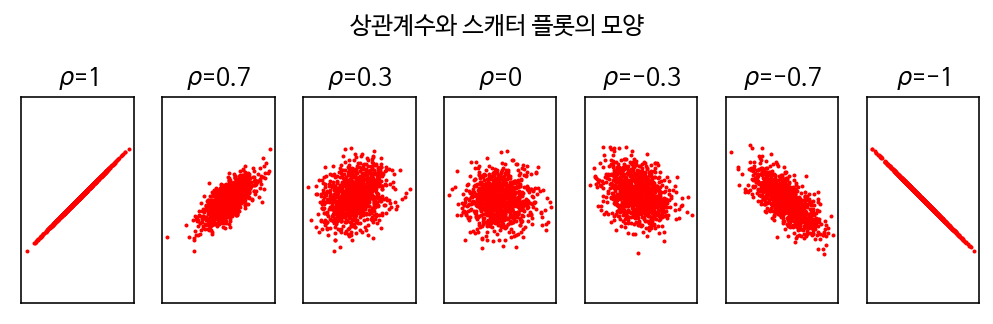

In [ ]:

np.random.seed(0)
corrs = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(corrs), 2))
for i, r in enumerate(corrs):
    x, y = np.random.multivariate_normal([0, 0], [[1, r], [r, 1]], 1000).T
    plt.subplot(1, len(corrs), i + 1)
    plt.plot(x, y, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    plt.title(r"$\rho$={}".format(r))

plt.suptitle("상관계수와 스캐터 플롯의 모양", y=1.1)
plt.tight_layout()
plt.show()

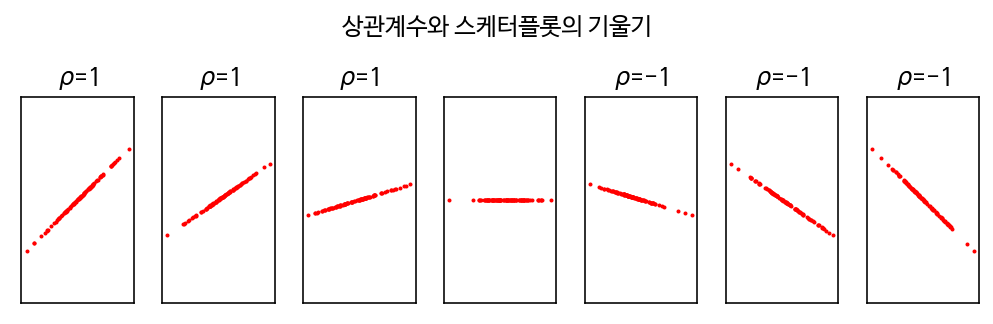

In [ ]:
# 상관계수는 스캐터 플롯의 기울기와는 아무런 상관이 없다.

np.random.seed(1)
slope = [1, 0.7, 0.3, 0, -0.3, -0.7, -1]
plt.figure(figsize=(len(slope), 2))
for i, s in enumerate(slope):
    plt.subplot(1, len(slope), i + 1)
    x, y = np.random.multivariate_normal([0, 0], [[1, 1], [1, 1]], 100).T
    y2 = s * y
    plt.plot(x, y2, 'ro', ms=1)
    plt.axis('equal')
    plt.xticks([])
    plt.yticks([])
    if s > 0:
        plt.title(r"$\rho$=1")
    if s < 0:
        plt.title(r"$\rho$=-1")

plt.suptitle("상관계수와 스케터플롯의 기울기", y=1.1)
plt.tight_layout()
plt.show()

### 4) 비선형 상관관계
1. 두 확률변수가 상관관계가 있으면 두 확률변수의 값 중 하나를 알았을 때 다른 확률변수의 값에 대한 정보를 알 수 있다.
2. 선형이 아닌 상관관계를 비선형 상관관계라고 한다.
3. 피어슨 상관계수는 두 확률변수의 관계가 선형적일 때만 상관관계를 제대로 계산할 수 있다. 

* 다음 데이터는 모두 $x$의 값으로부터 $y$값을 알 수 있기 때문에 상관관계를 가지고 있다. 하지만 피어슨 상관계수는 모두 0으로 계산된다.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


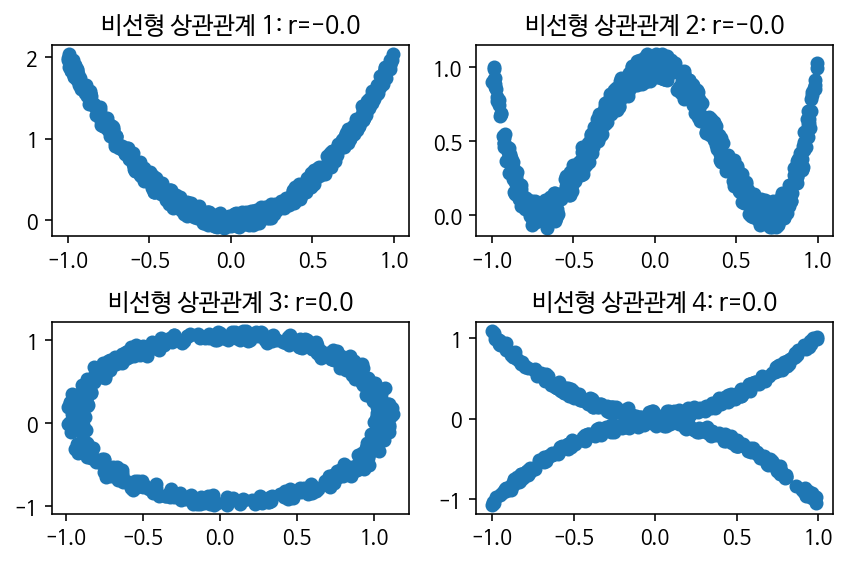

In [ ]:
n = 500
np.random.seed(1)
plt.subplot(221)
x1 = np.random.uniform(-1, 1, n)
y1 = 2*x1**2 + np.random.uniform(-0.1, 0.1, n)
plt.scatter(x1, y1)
r1 = sp.stats.pearsonr(x1, y1)[0]
plt.title(r"비선형 상관관계 1: r={:3.1f}".format(r1))
plt.subplot(222)
x2 = np.random.uniform(-1, 1, n)
y2 = 4*(x2**2-0.5)**2 + 0.1 * np.random.uniform(-1, 1, n)
plt.scatter(x2, y2)
r2 = sp.stats.pearsonr(x2, y2)[0]
plt.title(r"비선형 상관관계 2: r={:3.1f}".format(r2))
plt.subplot(223)
x3 = np.random.uniform(-1, 1, n)
y3 = np.cos(x3 * np.pi) + np.random.uniform(0, 1/8, n)
x3 = np.sin(x3 * np.pi) + np.random.uniform(0, 1/8, n)
plt.scatter(x3, y3)
r3 = sp.stats.pearsonr(x3, y3)[0]
plt.title(r"비선형 상관관계 3: r={:3.1f}".format(r3))
plt.subplot(224)
x4 = np.random.uniform(-1, 1, n)
y4 = (x4**2 + np.random.uniform(0, 0.1, n)) * \
    np.array([-1, 1])[np.random.random_integers(0, 1, size=n)]
plt.scatter(x4, y4)
r4 = sp.stats.pearsonr(x4, y4)[0]
plt.title(r"비선형 상관관계 4: r={:3.1f}".format(r4))
plt.tight_layout()
plt.show()

### 5) 앤스콤 데이터
1. 상관계수로 분포의 형상을 추측할 때 개별 자료가 상관계수에 미치는 영향력이 각각 다르다는 점에 유의해야 한다. 
2. 다음은 프랭크 앤스콤(Frank Anscombe)의 논문에 예시된 데이터다.
3. 이 데이터는 서로 다른 4종류의 2차원 데이터셋을 포함하는데 4종류 데이터셋 모두 상관계수가 약 0.816로 동일하다. 

In [ ]:
import statsmodels.api as sm

data = sm.datasets.get_rdataset("anscombe")
df = data.data
df[["x1", "y1", "x2", "y2", "x3", "y3", "x4", "y4"]]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


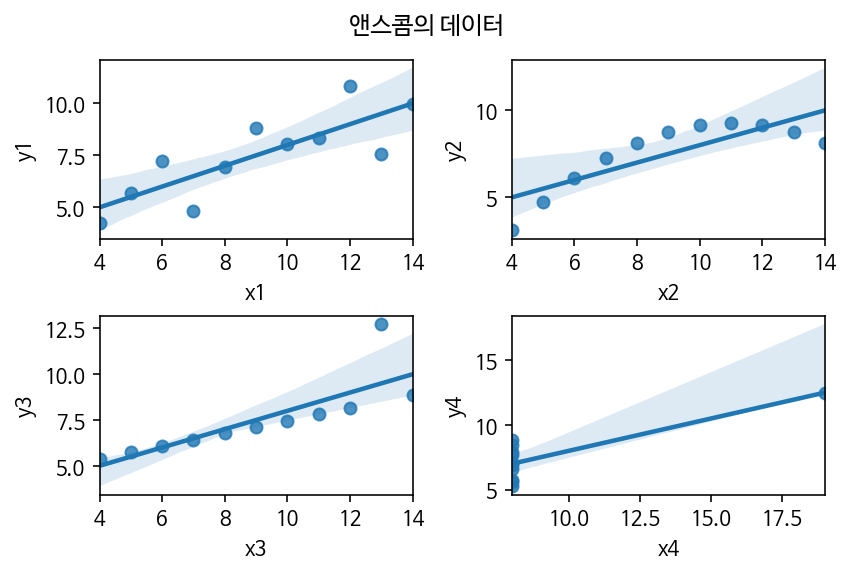

In [ ]:
plt.subplot(221)
sns.regplot(x="x1", y="y1", data=df)
plt.subplot(222)
sns.regplot(x="x2", y="y2", data=df)
plt.subplot(223)
sns.regplot(x="x3", y="y3", data=df)
plt.subplot(224)
sns.regplot(x="x4", y="y4", data=df)
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.suptitle("앤스콤의 데이터")
plt.show()

1. 첫번째 데이터셋(x1, y1)은 평범한 데이터셋이다. 
2. 두번째 데이터셋(x2, y2)은 비선형으로 완벽한 상관관계를 가진다.   
 ㄴ 즉 x값을 알면 y값을 완벽하게 알 수 있다.
3. 하지만 상관계수는 약 0.816으로 1인 아닌 값을 가진다. 즉, 상관계수는 비선형 상관관계를 표현하지 못한다.
4. 세번째 데이터셋과 네번째 데이터셋에서 볼 수 있듯이 나머지 데이터의 상관계수가 1 또는 0인 경우에도 단 하나의 특이값(outlier) 자료에 의해 상관계수가 크게 달라질 수 있다.

### 6) 다변수 확률변수의 표본공분산

1. 다변수 확률변수의 공분산 : 스칼라가 아닌 벡터 표본값을 가진다.
2. $X_1, X_2, \cdots, X_M$이라는 $M$개의 서로 다른 확률변수가 있다고 하자. 이 확률변수들의 표본 데이터가 각각 $N$개가 있으면 $j\;(j=1,\ldots,M)$번째 확률변수의 $i\;(i=1,\ldots,N)$번째 데이터를 $x_{i,j}$로 표기한다. 이를 하나의 행렬로 묶으면 다음과 같은 특징행렬이 된다.
> $ X = 
\begin{bmatrix}
x_{1, 1} & x_{1, 2} & \cdots   & x_{1, M} \\
x_{2, 1} & x_{2, 2} & \cdots   & x_{2, M} \\
\vdots   & \vdots  & \ddots   & \vdots   \\
x_{N, 1} & x_{N, 2} & \cdots   & x_{N, M} \\
\end{bmatrix}$
3. 표본공분산행렬(Sample Covariance Matrix) : $M$개의 서로 다른 확률변수의 모든 조합에 대한 공분산을 한꺼번에 표기하는 정의
> $S =
\begin{bmatrix}
s_{x_1}^2  & s_{x_1x_2} & \cdots & s_{x_1x_M} \\
s_{x_1x_2} & s_{x_2}^2  & \cdots & s_{x_2x_M} \\
\vdots     & \;\; \vdots& \ddots & \vdots \\
s_{x_1x_M} & s_{x_2x_M} & \cdots & s_{x_M}^2 \\
\end{bmatrix}$
> * ex) 두번째 행, 세번째 열의 원소 $s_{2,3}$은 두번째 확률변수와 세번째 확률변수의 공분산이다.
4. 표본공분산행렬 구하는 방법
 > (1) 각 확률변수 $x_j\,(j=1, \cdots, M)$의 표본평균을 계산한다.   
 >> $\bar{x}_j = \dfrac{1}{N} \sum_{i=1}^N x_{i,j}$

 > (2) 각 확률변수 $x_j\,(j=1, \cdots, M)$의 분산을 계산한다.
 >> $s_j^2 = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)^2 $   

 >(3) 두 확률변수 $x_j, x_k$의 공분산을 계산한다.   
 >> $ s_{j,k} = \dfrac{1}{N} \sum_{i=1}^N (x_{i,j} - \bar{x}_j)(x_{i,k} - \bar{x}_k) $

 >(4) If $x_i (i=1,\ldots, N)$가 다음과 같은 $M$-차원 표본 벡터로 정의하면. 
 >> $ x_i = \begin{bmatrix}x_{i,1} \\ \vdots \\ x_{i,M} \end{bmatrix} $
표본공분산행렬 $S$는 다음 식으로 구할 수 있다.
 >> $ S = \dfrac{1}{N}\sum_{i=1}^N (x_i-\bar{x})(x_i-\bar{x})^T$

### 7) 다변수 확률변수의 공분산

1. $M$개의 다변수 확률변수 벡터
> $ X = 
\begin{bmatrix}
X_1 \\
X_2 \\
\vdots \\
X_M 
\end{bmatrix}$
2. 이론적 공분산행렬은 $\Sigma$로 표기하며 다음처럼 정의한다. 
> $ \begin{aligned}
\Sigma = \text{Cov}[X] 
&=
\begin{bmatrix}
\sigma_{x_1}^2  &  \sigma_{x_1x_2} &  \sigma_{x_1x_3} &  \cdots &  \sigma_{x_1x_M} \\
\sigma_{x_1x_2} &  \sigma_{x_2}^2  &  \sigma_{x_2x_3} &  \cdots &  \sigma_{x_2x_M} \\
\vdots          &  \vdots          &  \vdots          &  \ddots &  \vdots          \\
\sigma_{x_1x_M} &  \sigma_{x_2x_M} &  \sigma_{x_3x_M} &  \cdots &  \sigma_{x_M}^2 \\
\end{bmatrix} \\
&=
\text{E} 
\begin{bmatrix}
(X_1 - \text{E}[X_1])^2                    & \cdots & (X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) \\
(X_1 - \text{E}[X_1])(X_2 - \text{E}[X_2]) & \cdots & (X_2 - \text{E}[X_2])(X_M - \text{E}[X_M]) \\
\vdots & \ddots &  \vdots  \\
(X_1 - \text{E}[X_1])(X_M - \text{E}[X_M]) & \cdots & (X_M - \text{E}[X_M])^2 
\end{bmatrix}
\end{aligned}$

3. 다음과 같이 표기할 수도 있다.
> $ \begin{aligned}
\Sigma 
&= \text{E} \left[ (X - \text{E}[X])(X - \text{E}[X])^T \right] \\
&= \text{E} 
\left[ 
\begin{bmatrix}
X_1 - \text{E}[X_1] \\
X_2 - \text{E}[X_2] \\
\vdots \\
X_M - \text{E}[X_M] \\
\end{bmatrix}
\begin{bmatrix}
X_1 - \text{E}[X_1] &
X_2 - \text{E}[X_2] &
\cdots &
X_M - \text{E}[X_M]
\end{bmatrix}
\right]
\end{aligned}$